In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df_dropped = df[['airline_sentiment', 'airline_sentiment_confidence', 'airline', 'text']]
df_dropped.dropna(inplace=True)
df_dropped

C:\Users\ujjwol\AppData\Local\Temp\ipykernel_15592\35605474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.dropna(inplace=True)


,airline_sentiment,airline_sentiment_confidence,airline,text
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...
14635,positive,0.3487,American,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,American,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,American,"@AmericanAir you have my money, you change my ..."


# Bar Plot for each sentiment of overall airlines

<Axes: xlabel='airline', ylabel='count'>

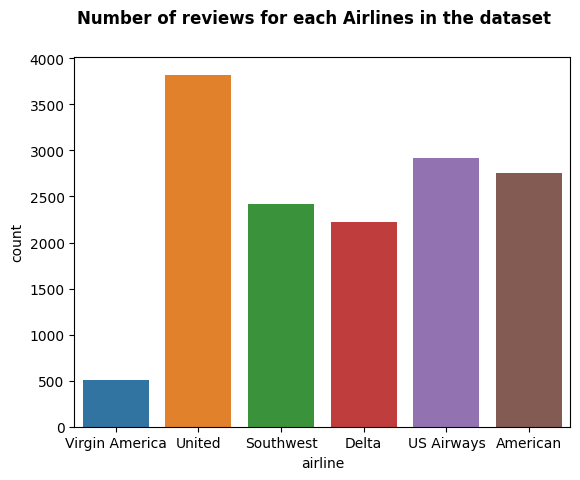

In [4]:
airline_counts = df_dropped['airline'].value_counts()

plt.suptitle("Number of reviews for each Airlines in the dataset", fontweight='bold')
sns.countplot(df_dropped, x='airline')

<Axes: xlabel='airline_sentiment', ylabel='count'>

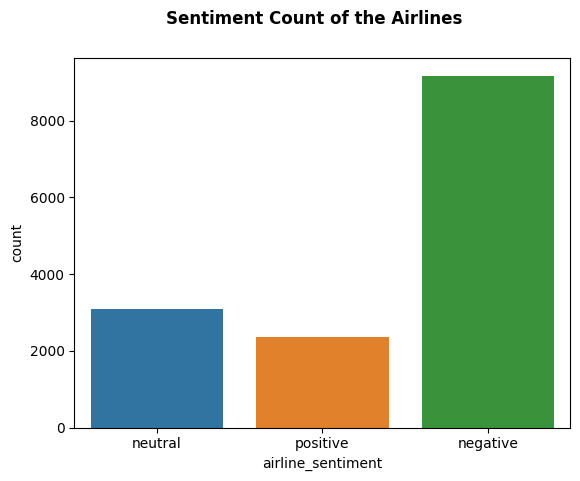

In [5]:
plt.suptitle("Sentiment Count of the Airlines", fontweight='bold')

senti_count = df_dropped['airline_sentiment'].value_counts()

#senti_count
sns.countplot(df_dropped, x='airline_sentiment')

# Categorize the airline_sentiment_confidence using equal frequency

In [6]:
# Define the number of quantiles (number of bins) for equal frequency discretization
num_bins_freq = 5

# Perform equal frequency discretization
df_dropped['airline_sentiment_confidence_equal_freq'] = pd.qcut(df_dropped['airline_sentiment_confidence'], q=num_bins_freq, duplicates='drop')

# Define the mapping of bins to values
bin_mapping = {bin_category: 1 if bin_category.right == 1.0 else 0 for bin_category in df_dropped['airline_sentiment_confidence_equal_freq'].unique()}

# Map the bins to values 0 and 1
df_dropped['confidence_category'] = df_dropped['airline_sentiment_confidence_equal_freq'].map(bin_mapping)

df_dropped

C:\Users\ujjwol\AppData\Local\Temp\ipykernel_15592\3648622370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['airline_sentiment_confidence_equal_freq'] = pd.qcut(df_dropped['airline_sentiment_confidence'], q=num_bins_freq, duplicates='drop')
C:\Users\ujjwol\AppData\Local\Temp\ipykernel_15592\3648622370.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['confidence_category'] = df_dropped['airline_sentiment_confidence_equal_freq'].map(bin_mapping)


,airline_sentiment,airline_sentiment_confidence,airline,text,airline_sentiment_confidence_equal_freq,confidence_category
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,"(0.678, 1.0]",1
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,"(0.334, 0.678]",0
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"(0.678, 1.0]",1
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,"(0.678, 1.0]",1
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,"(0.678, 1.0]",1
...,...,...,...,...,...,...
14635,positive,0.3487,American,@AmericanAir thank you we got on a different f...,"(0.334, 0.678]",0
14636,negative,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...,"(0.678, 1.0]",1
14637,neutral,1.0000,American,@AmericanAir Please bring American Airlines to...,"(0.678, 1.0]",1
14638,negative,1.0000,American,"@AmericanAir you have my money, you change my ...","(0.678, 1.0]",1


# Convert airline_sentiment into Numerical Data

In [7]:
one_hot_encoded = pd.get_dummies(df_dropped['airline_sentiment'], prefix='sentiment').astype(int)

one_hot_encoded = pd.concat([df_dropped, one_hot_encoded], axis=1)

#one_hot_df.drop('airline_sentiment', axis=1, inplace=True)

In [8]:
one_hot_encoded

,airline_sentiment,airline_sentiment_confidence,airline,text,airline_sentiment_confidence_equal_freq,confidence_category,sentiment_negative,sentiment_neutral,sentiment_positive
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,"(0.678, 1.0]",1,0,1,0
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,"(0.334, 0.678]",0,0,0,1
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"(0.678, 1.0]",1,0,1,0
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,"(0.678, 1.0]",1,1,0,0
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,"(0.678, 1.0]",1,1,0,0
...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,American,@AmericanAir thank you we got on a different f...,"(0.334, 0.678]",0,0,0,1
14636,negative,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...,"(0.678, 1.0]",1,1,0,0
14637,neutral,1.0000,American,@AmericanAir Please bring American Airlines to...,"(0.678, 1.0]",1,0,1,0
14638,negative,1.0000,American,"@AmericanAir you have my money, you change my ...","(0.678, 1.0]",1,1,0,0


In [9]:
df_dropped

,airline_sentiment,airline_sentiment_confidence,airline,text,airline_sentiment_confidence_equal_freq,confidence_category
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,"(0.678, 1.0]",1
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,"(0.334, 0.678]",0
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"(0.678, 1.0]",1
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,"(0.678, 1.0]",1
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,"(0.678, 1.0]",1
...,...,...,...,...,...,...
14635,positive,0.3487,American,@AmericanAir thank you we got on a different f...,"(0.334, 0.678]",0
14636,negative,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...,"(0.678, 1.0]",1
14637,neutral,1.0000,American,@AmericanAir Please bring American Airlines to...,"(0.678, 1.0]",1
14638,negative,1.0000,American,"@AmericanAir you have my money, you change my ...","(0.678, 1.0]",1


In [10]:
sentiment_mapping = {
    'positive': 2,
    'neutral': 1,
    'negative': 0
}

one_hot_df = df_dropped.copy()
# Create a new column 'airline_sentiment_encoded' with numerical values based on mapping
one_hot_df['airline_sentiment_encoded'] = df_dropped['airline_sentiment'].map(sentiment_mapping)

In [11]:
one_hot_df

,airline_sentiment,airline_sentiment_confidence,airline,text,airline_sentiment_confidence_equal_freq,confidence_category,airline_sentiment_encoded
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,"(0.678, 1.0]",1,1
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,"(0.334, 0.678]",0,2
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"(0.678, 1.0]",1,1
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,"(0.678, 1.0]",1,0
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,"(0.678, 1.0]",1,0
...,...,...,...,...,...,...,...
14635,positive,0.3487,American,@AmericanAir thank you we got on a different f...,"(0.334, 0.678]",0,2
14636,negative,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...,"(0.678, 1.0]",1,0
14637,neutral,1.0000,American,@AmericanAir Please bring American Airlines to...,"(0.678, 1.0]",1,1
14638,negative,1.0000,American,"@AmericanAir you have my money, you change my ...","(0.678, 1.0]",1,0


airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


Text(0.5, 0.98, 'Rate of each sentiment for the respective airlines')

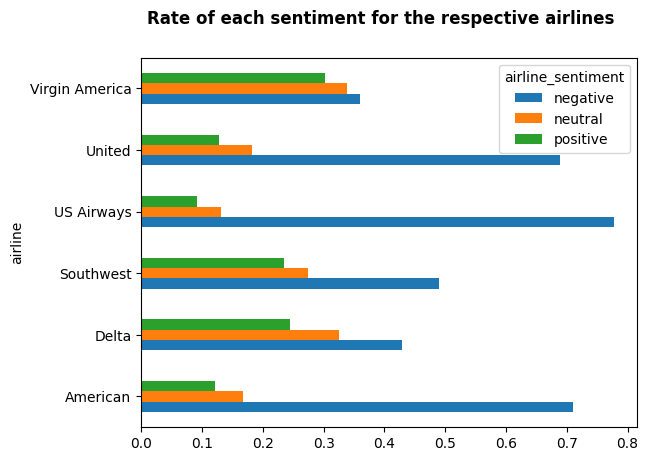

In [12]:
pivot_table_counts = one_hot_df.pivot_table(index='airline', columns='airline_sentiment', aggfunc='size', fill_value=0)

# Calculate the total count of each airline
airline_counts = one_hot_df['airline'].value_counts()

# Calculate the rates of each sentiment for each airline
sentiment_rates = pivot_table_counts.div(airline_counts, axis=0)

# Print the resulting rates
print(sentiment_rates)

sentiment_rates.plot.barh()
plt.suptitle("Rate of each sentiment for the respective airlines", fontweight='bold')

In [13]:
pivot_table_counts

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


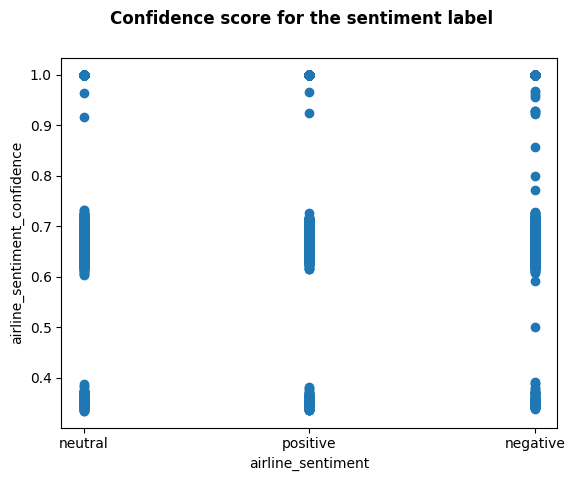

In [14]:
plt.suptitle("Confidence score for the sentiment label", fontweight='bold')
plt.scatter(df_dropped['airline_sentiment'], df_dropped['airline_sentiment_confidence'])
plt.xlabel('airline_sentiment')
plt.ylabel('airline_sentiment_confidence')
plt.show()

<Axes: xlabel='airline_sentiment_confidence', ylabel='Count'>

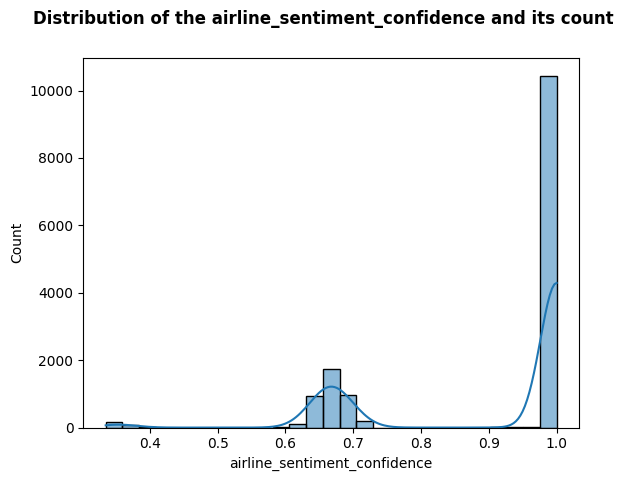

In [15]:
plt.suptitle("Distribution of the airline_sentiment_confidence and its count", fontweight='bold')
sns.histplot(df_dropped, x = 'airline_sentiment_confidence', kde = True)

In [16]:
df_dropped

,airline_sentiment,airline_sentiment_confidence,airline,text,airline_sentiment_confidence_equal_freq,confidence_category
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,"(0.678, 1.0]",1
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,"(0.334, 0.678]",0
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,"(0.678, 1.0]",1
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,"(0.678, 1.0]",1
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,"(0.678, 1.0]",1
...,...,...,...,...,...,...
14635,positive,0.3487,American,@AmericanAir thank you we got on a different f...,"(0.334, 0.678]",0
14636,negative,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...,"(0.678, 1.0]",1
14637,neutral,1.0000,American,@AmericanAir Please bring American Airlines to...,"(0.678, 1.0]",1
14638,negative,1.0000,American,"@AmericanAir you have my money, you change my ...","(0.678, 1.0]",1


# Text Preprocessing

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word.isalpha()])  # Remove punctuation and non-alphabetic words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization
    return text

df_dropped['text'] = df_dropped['text'].apply(preprocess_text)

C:\Users\ujjwol\AppData\Local\Temp\ipykernel_15592\1253894663.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['text'] = df_dropped['text'].apply(preprocess_text)


# Feature Extraction using TF-IDF

In [18]:
vectorizer = TfidfVectorizer()
new_text = vectorizer.fit_transform(df_dropped['text'])

df_dropped

,airline_sentiment,airline_sentiment_confidence,airline,text,airline_sentiment_confidence_equal_freq,confidence_category
0,neutral,1.0000,Virgin America,,"(0.678, 1.0]",1
1,positive,0.3486,Virgin America,plus added commercial,"(0.334, 0.678]",0
2,neutral,0.6837,Virgin America,must mean need take another,"(0.678, 1.0]",1
3,negative,1.0000,Virgin America,really aggressive blast obnoxious face little ...,"(0.678, 1.0]",1
4,negative,1.0000,Virgin America,really big bad thing,"(0.678, 1.0]",1
...,...,...,...,...,...,...
14635,positive,0.3487,American,thank got different flight,"(0.334, 0.678]",0
14636,negative,1.0000,American,leaving minute late warning communication minu...,"(0.678, 1.0]",1
14637,neutral,1.0000,American,please bring american airline,"(0.678, 1.0]",1
14638,negative,1.0000,American,change answer suggestion make,"(0.678, 1.0]",1


In [19]:
final_one_hot = pd.get_dummies(df_dropped['airline'], prefix='airline').astype(int)
final_one_hot = pd.concat([df_dropped.drop(['airline'], axis =1), final_one_hot], axis =1)
final_one_hot

,airline_sentiment,airline_sentiment_confidence,text,airline_sentiment_confidence_equal_freq,confidence_category,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,neutral,1.0000,,"(0.678, 1.0]",1,0,0,0,0,0,1
1,positive,0.3486,plus added commercial,"(0.334, 0.678]",0,0,0,0,0,0,1
2,neutral,0.6837,must mean need take another,"(0.678, 1.0]",1,0,0,0,0,0,1
3,negative,1.0000,really aggressive blast obnoxious face little ...,"(0.678, 1.0]",1,0,0,0,0,0,1
4,negative,1.0000,really big bad thing,"(0.678, 1.0]",1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,thank got different flight,"(0.334, 0.678]",0,1,0,0,0,0,0
14636,negative,1.0000,leaving minute late warning communication minu...,"(0.678, 1.0]",1,1,0,0,0,0,0
14637,neutral,1.0000,please bring american airline,"(0.678, 1.0]",1,1,0,0,0,0,0
14638,negative,1.0000,change answer suggestion make,"(0.678, 1.0]",1,1,0,0,0,0,0


In [20]:
df_forGNB = final_one_hot.drop(['airline_sentiment', 'airline_sentiment_confidence_equal_freq', 'text', 'confidence_category'], axis=1)
df_forGNB

,airline_sentiment_confidence,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1.0000,0,0,0,0,0,1
1,0.3486,0,0,0,0,0,1
2,0.6837,0,0,0,0,0,1
3,1.0000,0,0,0,0,0,1
4,1.0000,0,0,0,0,0,1
...,...,...,...,...,...,...,...
14635,0.3487,1,0,0,0,0,0
14636,1.0000,1,0,0,0,0,0
14637,1.0000,1,0,0,0,0,0
14638,1.0000,1,0,0,0,0,0


In [21]:
classes = df_dropped['airline_sentiment']
classes

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [22]:
contingency_table = pd.crosstab(df_dropped['airline_sentiment'], df_dropped['airline'])
contingency_table

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,1960,955,1186,2263,2633,181
neutral,463,723,664,381,697,171
positive,336,544,570,269,492,152


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(df_forGNB, classes, test_size = 0.2, random_state=42)
# train_data = pd.concat([X_train, Y_train], axis = 1)
# test_data = pd.concat([X_test, Y_test], axis = 1)

In [24]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [25]:
print(df_forGNB.describe())

       airline_sentiment_confidence  airline_American  airline_Delta  \
count                  14640.000000      14640.000000   14640.000000   
mean                       0.900169          0.188456       0.151776   
std                        0.162830          0.391089       0.358816   
min                        0.335000          0.000000       0.000000   
25%                        0.692300          0.000000       0.000000   
50%                        1.000000          0.000000       0.000000   
75%                        1.000000          0.000000       0.000000   
max                        1.000000          1.000000       1.000000   

       airline_Southwest  airline_US Airways  airline_United  \
count       14640.000000        14640.000000    14640.000000   
mean            0.165301            0.198975        0.261066   
std             0.371464            0.399243        0.439231   
min             0.000000            0.000000        0.000000   
25%             0.000000       

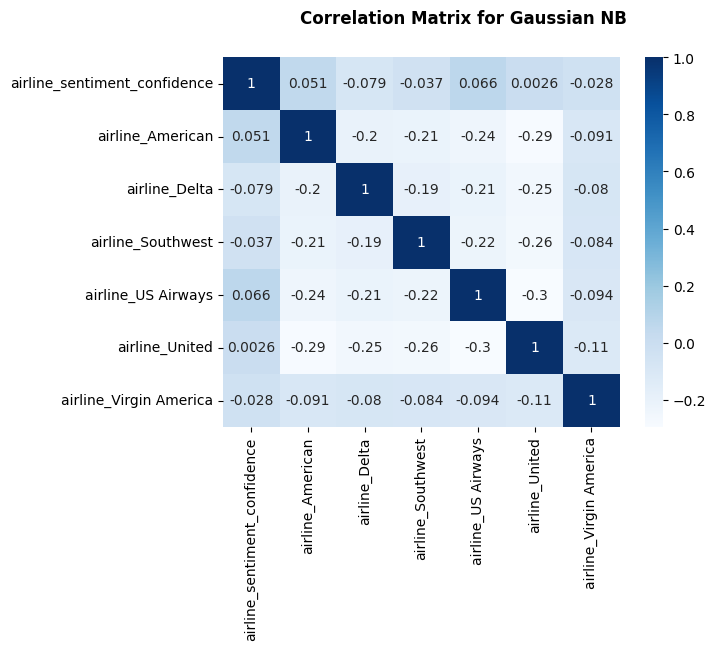

In [26]:
plt.suptitle("Correlation Matrix for Gaussian NB", fontweight='bold')
corMat = df_forGNB.corr()
sns.heatmap(corMat, cmap = 'Blues', annot =True)
plt.show()

In [27]:
Y_pred = GNB.predict(X_test)
Y_pred

array(['negative', 'negative', 'neutral', ..., 'negative', 'neutral',
       'negative'], dtype='<U8')

In [28]:
Y_test

4794     positive
10480    negative
8067     negative
8880      neutral
8292     negative
           ...   
11765    negative
14156    negative
10963     neutral
4877      neutral
5206     negative
Name: airline_sentiment, Length: 2928, dtype: object

In [29]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(Y_test, Y_pred, target_names=['negative', 'neutral', 'positive']))

Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.83      0.77      1889
     neutral       0.32      0.35      0.34       580
    positive       0.23      0.06      0.09       459

    accuracy                           0.62      2928
   macro avg       0.43      0.41      0.40      2928
weighted avg       0.57      0.62      0.58      2928



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1574,  264,   51],
       [ 339,  203,   38],
       [ 271,  161,   27]], dtype=int64)

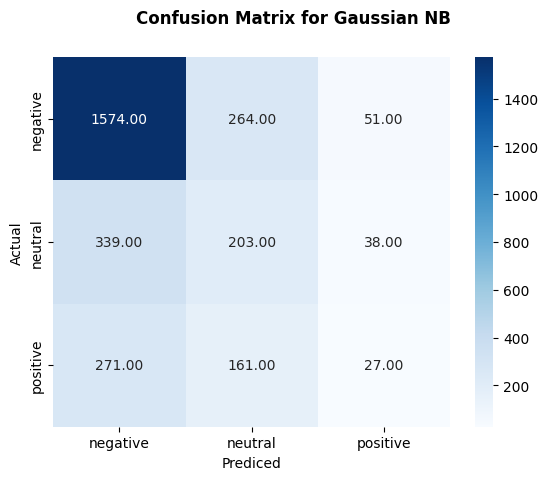

In [31]:
plt.suptitle("Confusion Matrix for Gaussian NB", fontweight='bold')
sns.heatmap(cm, cmap="Blues", annot=True, fmt='.2f',
           xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()

# Multinomial NB

In [32]:
df_forMNB = final_one_hot.drop(['airline_sentiment', 'airline_sentiment_confidence_equal_freq', 'text', 'airline_sentiment_confidence'], axis=1)
df_forMNB

,confidence_category,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
14635,0,1,0,0,0,0,0
14636,1,1,0,0,0,0,0
14637,1,1,0,0,0,0,0
14638,1,1,0,0,0,0,0


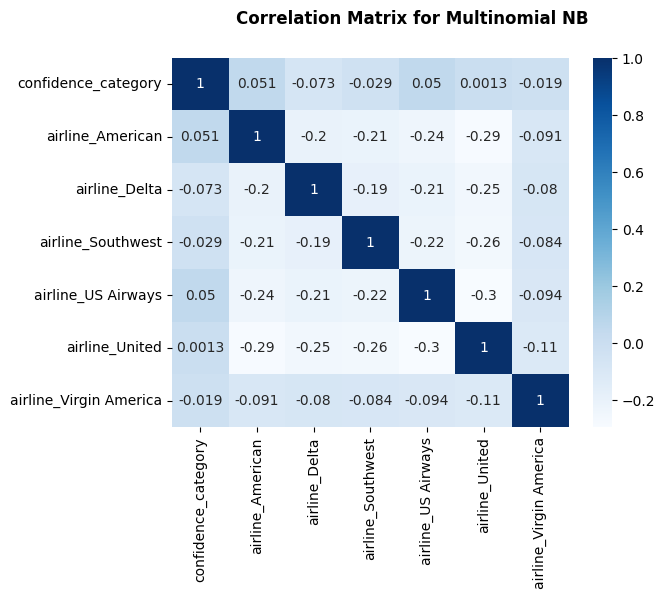

In [33]:
plt.suptitle("Correlation Matrix for Multinomial NB", fontweight='bold')
corMat = df_forMNB.corr()
sns.heatmap(corMat, cmap = 'Blues', annot =True)
plt.show()

In [34]:
mX_train, mX_test, mY_train, mY_test = train_test_split(df_forMNB, classes, test_size = 0.2, random_state=42)
# mtrain_data = pd.concat([mX_train, mY_train], axis = 1)
# mtest_data = pd.concat([mX_test, mY_test], axis = 1)

In [35]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(mX_train, mY_train)

mY_pred = naive_bayes_classifier.predict(mX_test)

In [36]:
accuracy = accuracy_score(mY_test, mY_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(mY_test, mY_pred, target_names=['negative', 'neutral', 'positive']))

Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      1.00      0.79      1889
     neutral       0.58      0.03      0.05       580
    positive       0.00      0.00      0.00       459

    accuracy                           0.65      2928
   macro avg       0.41      0.34      0.28      2928
weighted avg       0.53      0.65      0.52      2928



C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(mY_test, mY_pred)
cm

array([[1881,    8,    0],
       [ 565,   15,    0],
       [ 456,    3,    0]], dtype=int64)

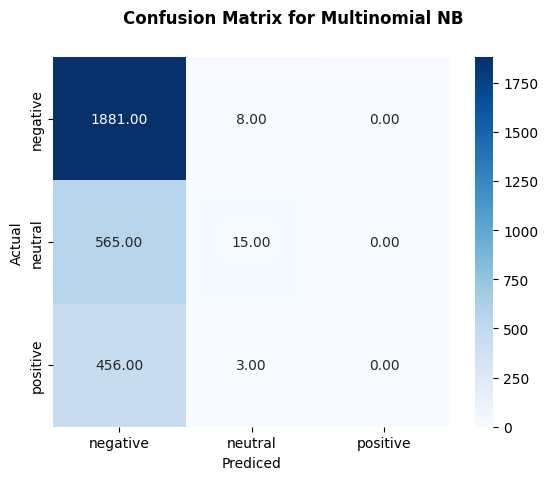

In [38]:
plt.suptitle("Confusion Matrix for Multinomial NB", fontweight='bold')
sns.heatmap(cm, cmap="Blues", annot=True, fmt='.2f',
           xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()

# Naive Bayes for Text and Sentiment

In [39]:
y = df_dropped['airline_sentiment']

In [40]:
tX_train, tX_test, tY_train, tY_test = train_test_split(new_text, y, test_size=0.2, random_state=42)

In [41]:
tnaive_bayes_classifier = MultinomialNB()
tnaive_bayes_classifier.fit(tX_train, tY_train)

MultinomialNB()

In [42]:
tY_pred = tnaive_bayes_classifier.predict(tX_test)

In [43]:
accuracy = accuracy_score(tY_test, tY_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(tY_test, tY_pred, target_names=['negative', 'neutral', 'positive']))

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.99      0.82      1889
     neutral       0.70      0.13      0.23       580
    positive       0.86      0.24      0.38       459

    accuracy                           0.70      2928
   macro avg       0.75      0.46      0.47      2928
weighted avg       0.72      0.70      0.63      2928



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(tY_test, tY_pred)
cm

array([[1870,   14,    5],
       [ 489,   78,   13],
       [ 328,   20,  111]], dtype=int64)

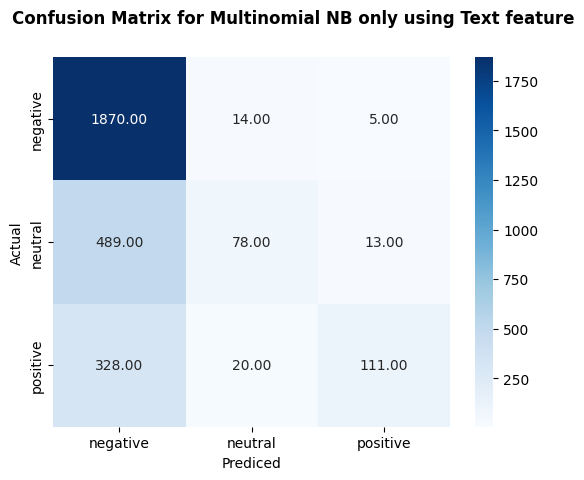

In [45]:
plt.suptitle("Confusion Matrix for Multinomial NB only using Text feature", fontweight='bold')
sns.heatmap(cm, cmap="Blues", annot=True, fmt='.2f',
           xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()

# Hybrid Naive Bayes Classifier

In [46]:
hyb_df = final_one_hot.drop(['airline_sentiment', 'text','airline_sentiment_confidence_equal_freq'], axis=1)
hyb_df

,airline_sentiment_confidence,confidence_category,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1.0000,1,0,0,0,0,0,1
1,0.3486,0,0,0,0,0,0,1
2,0.6837,1,0,0,0,0,0,1
3,1.0000,1,0,0,0,0,0,1
4,1.0000,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
14635,0.3487,0,1,0,0,0,0,0
14636,1.0000,1,1,0,0,0,0,0
14637,1.0000,1,1,0,0,0,0,0
14638,1.0000,1,1,0,0,0,0,0


In [47]:
target_class = final_one_hot['airline_sentiment']
target_class

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [48]:
hX_train, hX_test, hY_train, hY_test = train_test_split(hyb_df, target_class, test_size=0.2, random_state=42)

In [49]:
hX_train_cont = hX_train.drop('confidence_category', axis=1)
hX_train_disc = hX_train.drop('airline_sentiment_confidence', axis=1)

hX_test_cont = hX_test.drop('confidence_category', axis=1)
hX_test_disc = hX_test.drop('airline_sentiment_confidence', axis=1)

In [50]:
gnb_cont = GaussianNB()
mnb_disc = MultinomialNB()

In [51]:
gnb_cont = gnb_cont.fit(hX_train_cont, hY_train)
mnb_disc = mnb_disc.fit(hX_train_disc, hY_train)

In [52]:
gnb_probab = gnb_cont.predict_proba(hX_test_cont)
mnb_probab = mnb_disc.predict_proba(hX_test_disc)

In [53]:
hY_predict_probab = gnb_probab*mnb_probab

hY_predict = np.argmax(hY_predict_probab, axis=1)

In [54]:
hY_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)